# Model Predictions for Chlorophyll Levels

This notebook loads the trained models and makes predictions on the cleaned dataset.

In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
# Load the cleaned data
df = pd.read_csv('cleaned_data.csv')
print("Data shape:", df.shape)

df

Data shape: (1708, 17)


,time,longitude,latitude,thetao,so,uo,vo,wo,kd,ph,spco2,o2,no3,po4,si,fe,chl
0,2025-01-01,87.26,19.97,24.463710,30.846056,-0.032801,-0.041873,2.472016e-08,0.061784,8.081079,33.983177,214.18227,0.028434,0.035814,1.484352,0.001691,0.823264
1,2025-01-01,87.70,19.97,25.259663,32.383970,-0.032801,-0.066421,4.294948e-08,0.061416,8.060937,35.911453,208.17493,0.033679,0.057536,1.690931,0.001672,1.242999
2,2025-01-01,88.58,19.99,25.936096,33.355045,-0.086984,-0.010332,4.507891e-08,0.049946,8.043919,38.872276,209.56064,0.031080,0.073519,1.766548,0.001691,2.038893
3,2025-01-01,89.02,19.99,26.054684,33.496220,-0.086984,0.012987,4.102340e-08,0.048111,8.042045,38.505657,210.43271,0.028767,0.070911,1.812253,0.001720,2.051734
4,2025-01-01,89.90,20.01,26.124374,33.565876,-0.100962,0.016858,3.595334e-08,0.048510,8.044349,38.366405,210.07358,0.057479,0.060628,1.828091,0.001752,1.549865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1703,2029-12-01,90.75,21.32,27.775320,32.848130,-0.039491,0.024635,5.268714e-08,0.085374,8.019429,41.528930,203.16068,0.057365,0.019050,1.295856,0.002203,0.433064
1704,2029-12-01,87.67,21.57,26.230286,27.032500,0.033251,-0.014300,-1.124159e-07,0.113466,8.079239,30.076532,206.14552,0.029071,0.029042,1.317138,0.001594,0.359576
1705,2029-12-01,88.55,21.58,26.366900,30.978502,0.013266,-0.053600,-8.973735e-08,0.085398,8.053456,36.479973,205.01813,0.030604,0.018437,1.235428,0.001945,0.426599
1706,2029-12-01,88.98,21.59,26.139822,32.877464,-0.032583,-0.008526,4.555405e-08,0.069958,8.045031,38.763214,204.97984,0.036267,0.007088,1.255701,0.002267,0.437492


In [3]:
# Load the models and scaler
from joblib import load

scaler = load('../models/scaler.pkl')
rf_model = load('../models/random_forest.pkl')
nn_model = load('../models/neural_network.pkl')

In [4]:
# Prepare features (excluding chl and time/lat/lon)
feature_cols = ['thetao', 'so', 'uo', 'vo', 'wo', 'kd', 'ph', 'spco2', 'o2', 'no3', 'po4', 'si', 'fe']
X = df[feature_cols]
y = df['chl']

# Scale the features
X_scaled = scaler.transform(X)

In [5]:
# Make predictions with each model
predictions = {
    'Random Forest': rf_model.predict(X_scaled),
    'Neural Network': nn_model.predict(X_scaled),
}

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'Actual': y,
    'Random Forest': predictions['Random Forest'],
    'Neural Network': predictions['Neural Network'],
})

print("\nFew rows of predictions:")
results_df


Few rows of predictions:


,Actual,Random Forest,Neural Network
0,0.823264,0.361717,0.415160
1,1.242999,0.361744,0.409317
2,2.038893,0.244454,0.296240
3,2.051734,0.224883,0.277285
4,1.549865,0.237264,0.260709
...,...,...,...
1703,0.433064,0.691154,0.724704
1704,0.359576,1.013991,0.973840
1705,0.426599,0.692259,0.687593
1706,0.437492,0.461212,0.488944


In [6]:
# Calculate and display metrics for each model
metrics = {}
for model_name in predictions.keys():
    metrics[model_name] = {
        'R2 Score': r2_score(y, predictions[model_name]),
        'MSE': mean_squared_error(y, predictions[model_name]),
        'RMSE': np.sqrt(mean_squared_error(y, predictions[model_name])),
        'MAE': mean_absolute_error(y, predictions[model_name])
    }

metrics_df = pd.DataFrame(metrics).round(4)
print("\nModel Performance Metrics:")
display(metrics_df)


Model Performance Metrics:


,Random Forest,Neural Network
R2 Score,-2.3072,-2.1057
MSE,1.6679,1.5663
RMSE,1.2915,1.2515
MAE,1.0440,0.9997


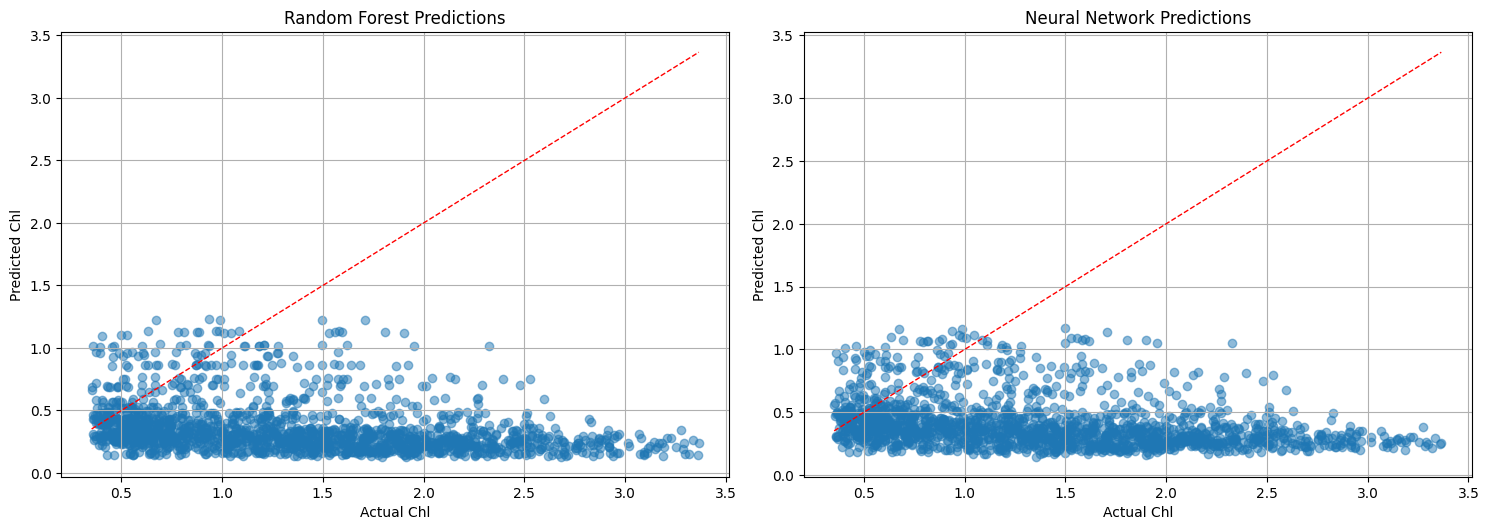

In [7]:
# Visualize actual vs predicted values
plt.figure(figsize=(15, 10))
for i, model_name in enumerate(predictions.keys(), 1):
    plt.subplot(2, 2, i)
    plt.scatter(y, predictions[model_name], alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=1)
    plt.xlabel('Actual Chl')
    plt.ylabel('Predicted Chl')
    plt.title(f'{model_name} Predictions')
    plt.grid(True)
plt.tight_layout()
plt.show()